# Alicja Misiuda 26.06.2024

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

First, it is necessary to create the spectrograms.

In [2]:
# Load in sounds
flute, sr_flute = librosa.load('flute.wav')
violin, sr_violin = librosa.load('violin.wav')
print(sr_flute, "sr_flute sampling rate")
print(sr_violin, "sr_violin sampling rate")

22050 sr_flute sampling rate
22050 sr_violin sampling rate


In [3]:
# Process signal with stft
def to_decibles(signal):
    # stft with abs value
    stft = np.abs(librosa.stft(signal))
    # Convert to dB
    D = librosa.amplitude_to_db(stft, ref = np.max) # Set reference value to the maximum value of stft.
    return D 

# Function to plot the converted audio signal
def plot_spec(D, sr, instrument):
    fig, ax = plt.subplots(figsize = (30,10))
    spec = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title = 'Spectrogram of ' + instrument)
    fig.colorbar(spec)

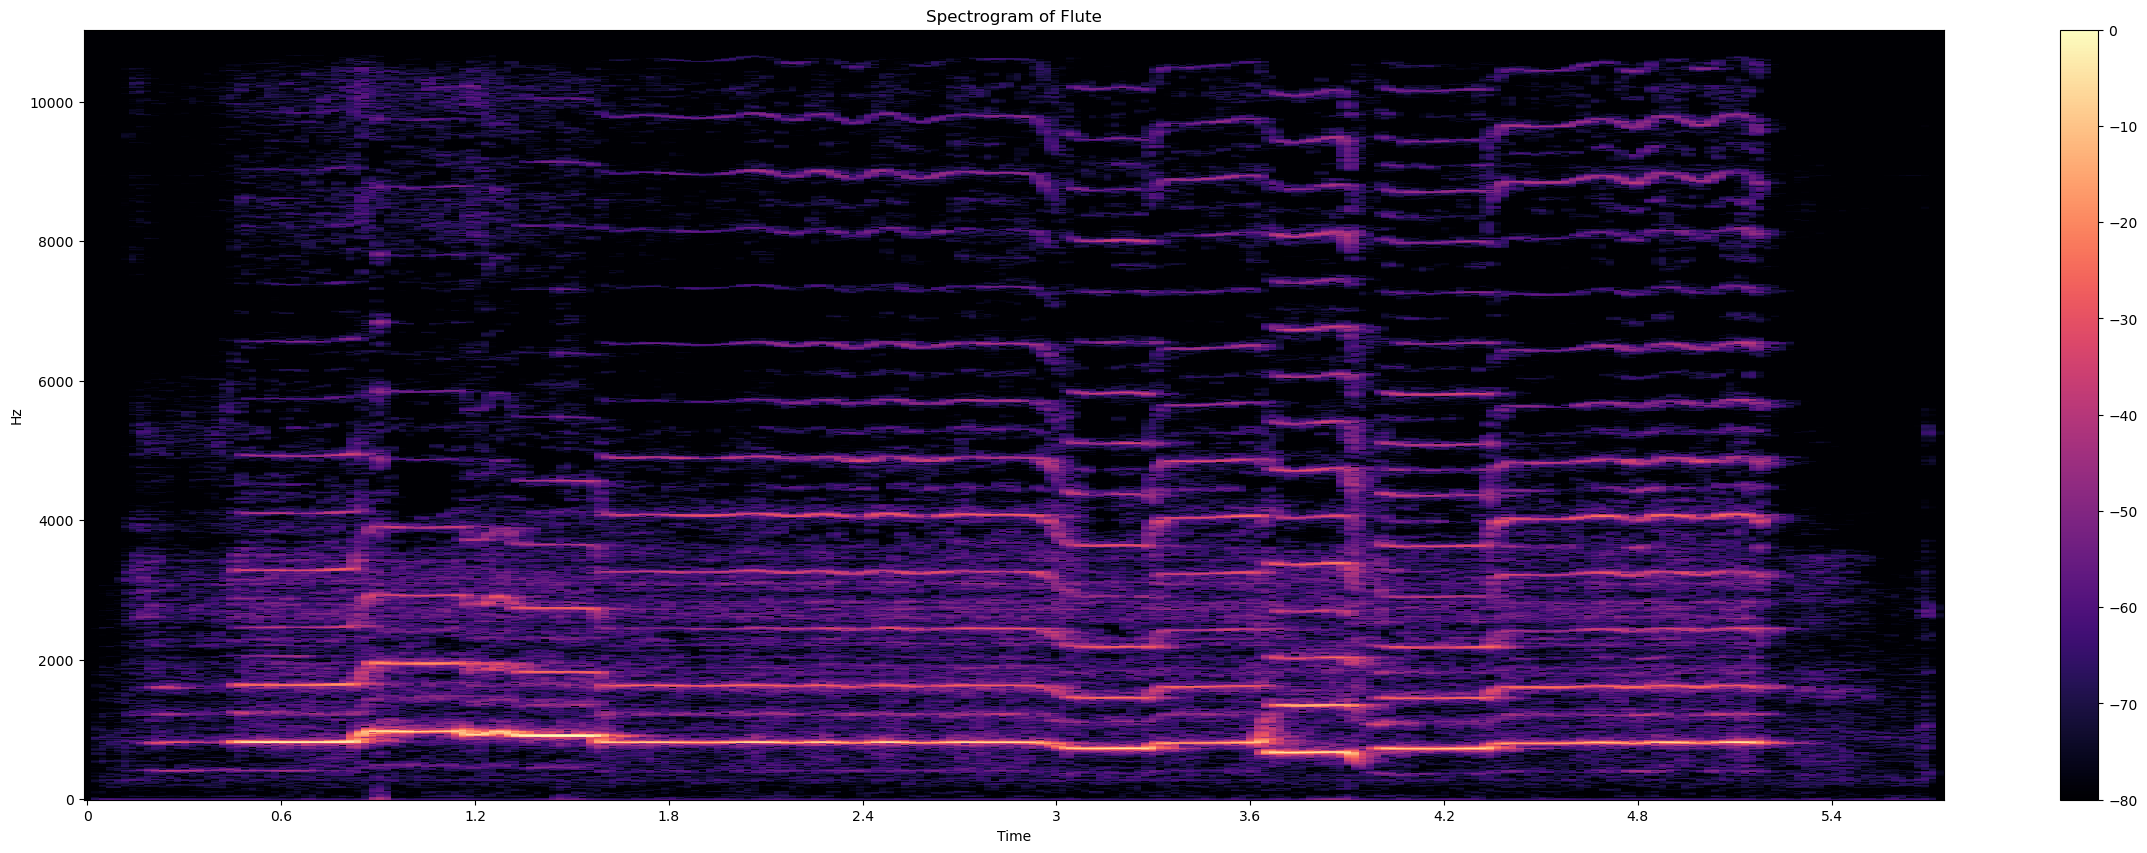

In [21]:
plot_spec(to_decibles(flute), sr_flute, 'Flute')
plt.savefig("out_flute.png")

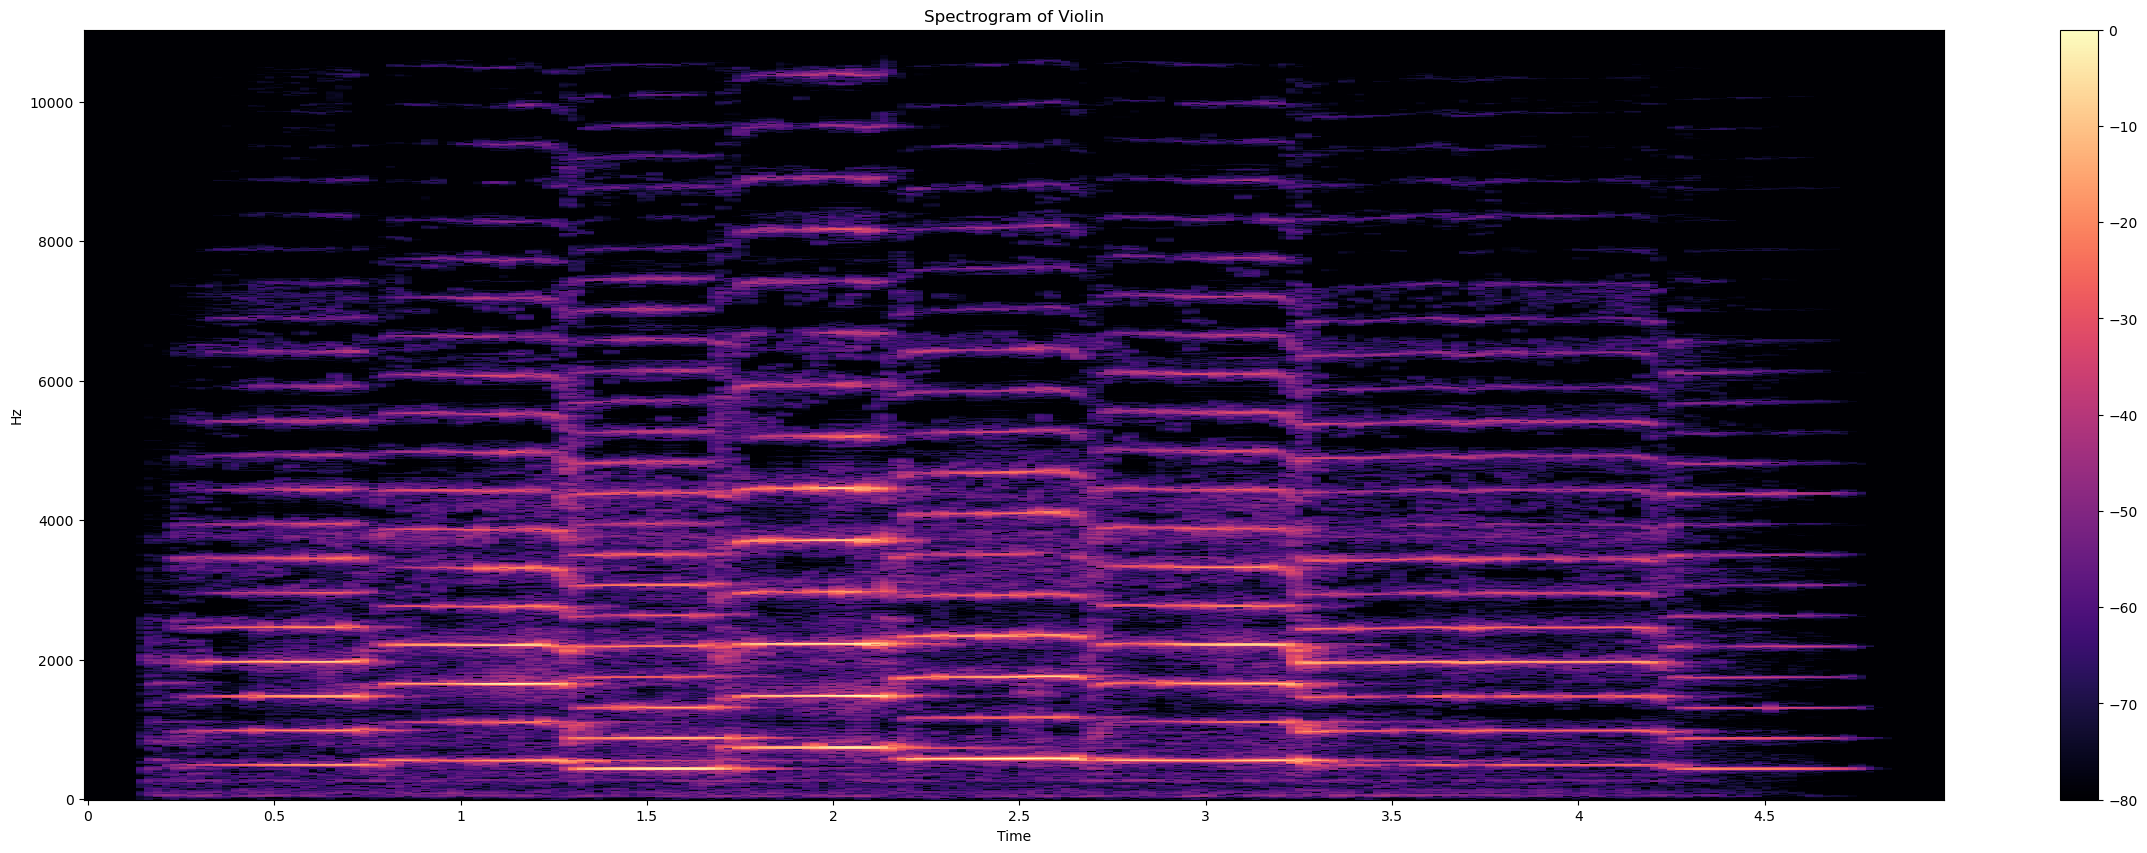

In [22]:
plot_spec(to_decibles(violin), sr_violin, 'Violin')

Creating a complex spectrogram and inversing with stft

In [4]:
# MAGNITUDE AND PHASE (FASTER)
# Load audio file
file = 'flute.wav'
sig, fs = librosa.load(file, sr=sr_flute)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(sig)

# Magnitude and phase
magnitude = np.abs(D)
phase = np.angle(D)

# Reconstruct the complex spectrogram
complex_spectrogram = magnitude * np.exp(1j * phase)

# Inverse STFT
reconstructed_signal = librosa.istft(complex_spectrogram)

print(reconstructed_signal)
print("reconstructed signal shape: ", reconstructed_signal.shape)

# Write the reconstructed audio signal to a file using soundfile
sf.write('test3.wav', reconstructed_signal, fs)

[-5.4145705e-11 -5.6763021e-11 -5.8665663e-11 ...  1.5916430e-11
  9.9524581e-12 -1.0757413e-11]
reconstructed signal shape:  (126464,)


In [16]:
from PIL import Image
import numpy as np

# Open the PNG image
img = Image.open('carved.png')

# Convert image data to grayscale and then to a 1-dimensional numpy array
img_gray = img.convert('L')
img_array = np.array(img_gray).flatten()

print(f"Shape of 1D array: {img_array.shape}")
print(f"Example of pixel values: {img_array[:10]}")  # Print first 10 pixel values

# Assume you have already reconstructed magnitude and phase from img_array
# Example:
# Reconstruction of magnitude and phase should be implemented here
# For demonstration purposes, let's assume placeholders:
magnitude = np.abs(img_array)  # Replace with actual reconstruction process
phase = np.angle(img_array)    # Replace with actual reconstruction process

# Reconstruct complex spectrogram
complex_spectrogram = magnitude * np.exp(1j * phase)


# Reshape magnitude and phase to match the expected shape
n_fft = 2048  # Example: Replace with your actual FFT window size
T = magnitude.shape[0] // (n_fft // 2 + 1)

magnitude = magnitude.reshape((n_fft // 2 + 1, T))
phase = phase.reshape((n_fft // 2 + 1, T))

# Reconstruct complex spectrogram
complex_spectrogram = magnitude * np.exp(1j * phase)

# Print shape for debugging
print(f"Shape of complex_spectrogram: {complex_spectrogram.shape}")

# Define parameters
hop_length = 512  # Example: Replace with your actual hop length
win_length = 2048  # Example: Replace with your actual window length

# Inverse STFT to reconstruct audio signal
try:
    reconstructed_signal = librosa.istft(complex_spectrogram, hop_length=hop_length, win_length=win_length)
except Exception as e:
    print(f"Error occurred: {e}")

# Inverse STFT to reconstruct audio signal
#reconstructed_signal = librosa.istft(complex_spectrogram)

# Write reconstructed audio signal to a WAV file
sf.write('reconstructed_audio.wav', reconstructed_signal, fs)

Shape of 1D array: (275400,)
Example of pixel values: [0 0 0 0 0 0 0 0 0 0]


ValueError: cannot reshape array of size 275400 into shape (1025,268)

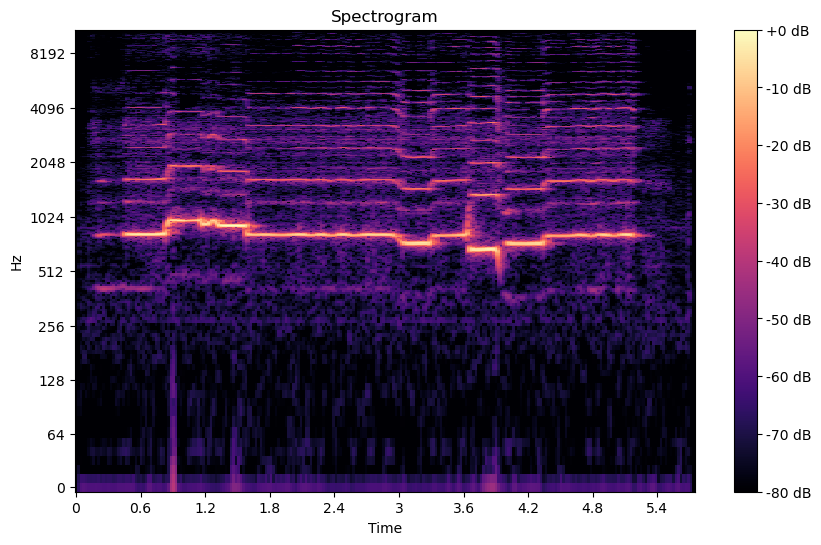

In [5]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load an example audio file
file = 'flute.wav'
sig, sr = librosa.load(file, sr=22050)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(sig)

# Convert the amplitude to decibels for better visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()


In [11]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
#SAVING OUTPUT PNG
# Load an example audio file
file = 'flute.wav'
sig, sr = librosa.load(file, sr=22050)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(sig)

# Convert the amplitude to decibels for better visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram with adjusted parameters
plt.figure(figsize=(2, 1))  # Larger figure size
plt.imshow(D_db, aspect='auto', origin='lower', cmap='magma')  # Using viridis colormap
plt.axis('off')  # Turn off axis
plt.tight_layout()

# Save the plot as an image with higher DPI
plt.savefig('flutespec.png', bbox_inches='tight', pad_inches=0, dpi=600)  # Higher DPI
plt.close()


In [8]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
from io import BytesIO
from PIL import Image
import os

# Load an example audio file
file = 'flute.wav'
sig, sr = librosa.load(file, sr=22050)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(sig)

# Convert the amplitude to decibels for better visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram with adjusted parameters
plt.figure(figsize=(6, 3))  # Larger figure size
plt.imshow(D_db, aspect='auto', origin='lower', cmap='magma')  # Using magma colormap
plt.axis('off')  # Turn off axis
plt.tight_layout()

# Save the plot to a buffer
buf = BytesIO()
plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0, dpi=600)  # Higher DPI
plt.close()
buf.seek(0)

# Open the image with Pillow
image = Image.open(buf)

# Initialize the final buffer to store the result
final_buf = BytesIO()

# Iterate to adjust the quality to achieve ~160KB size
for quality in range(95, 10, -5):  # Start high, decrease in steps
    buf_out = BytesIO()
    image.save(buf_out, format='PNG', optimize=True, quality=quality)
    size_kb = buf_out.tell() / 1024
    if size_kb <= 160:
        final_buf = buf_out
        break
else:
    # If no suitable quality found, use the lowest quality tested
    final_buf = buf_out

# Save the final buffer to a file
with open('flutespec.png', 'wb') as f:
    f.write(final_buf.getvalue())

# Check the file size
file_size = os.path.getsize('flutespec.png')
print(f"File size: {file_size / 1024:.2f} KB")


File size: 2843.05 KB


Plotting using Mel Spectrograms

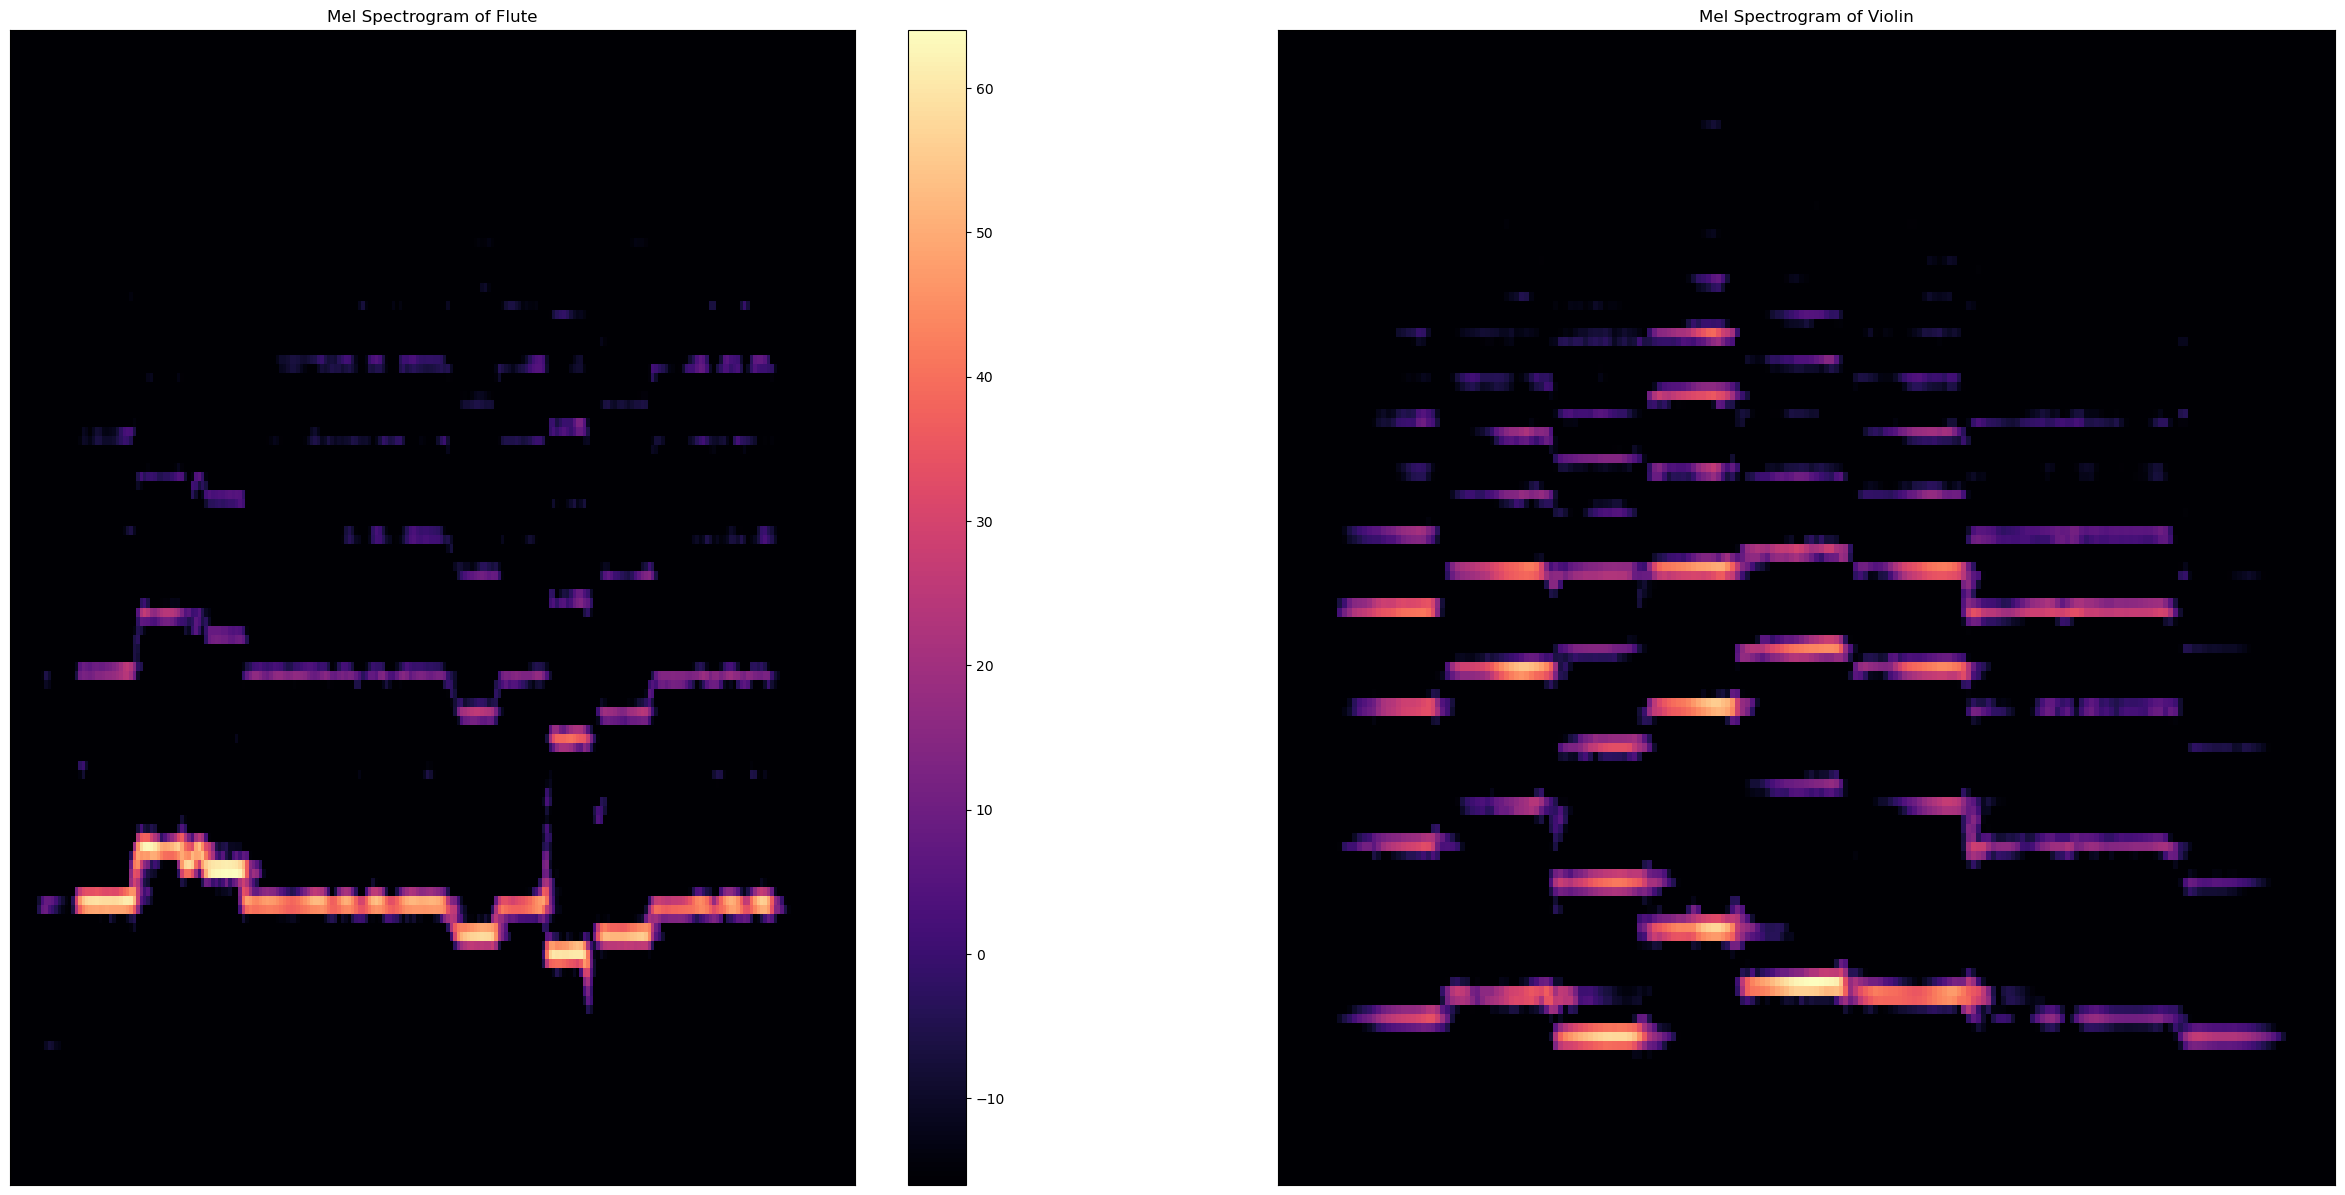

In [31]:
# Create Mel Spectrograms of sounds
fluteSpec = librosa.feature.melspectrogram(y=flute, sr=sr_flute)
violinSpec = librosa.feature.melspectrogram(y=violin, sr=sr_violin)

# Convert amplitudes to dB
fluteSpec = librosa.amplitude_to_db(fluteSpec)
violinSpec = librosa.amplitude_to_db(violinSpec)

# Plot mel spectrograms
fig, ax = plt.subplots(1,2, figsize = (30,15))
ax[0].set(title = 'Mel Spectrogram of Flute')
i = librosa.display.specshow(fluteSpec, ax=ax[0], cmap = 'magma')
ax[1].set(title = 'Mel Spectrogram of Violin')
librosa.display.specshow(violinSpec, ax=ax[1], cmap = 'magma')
plt.colorbar(i)

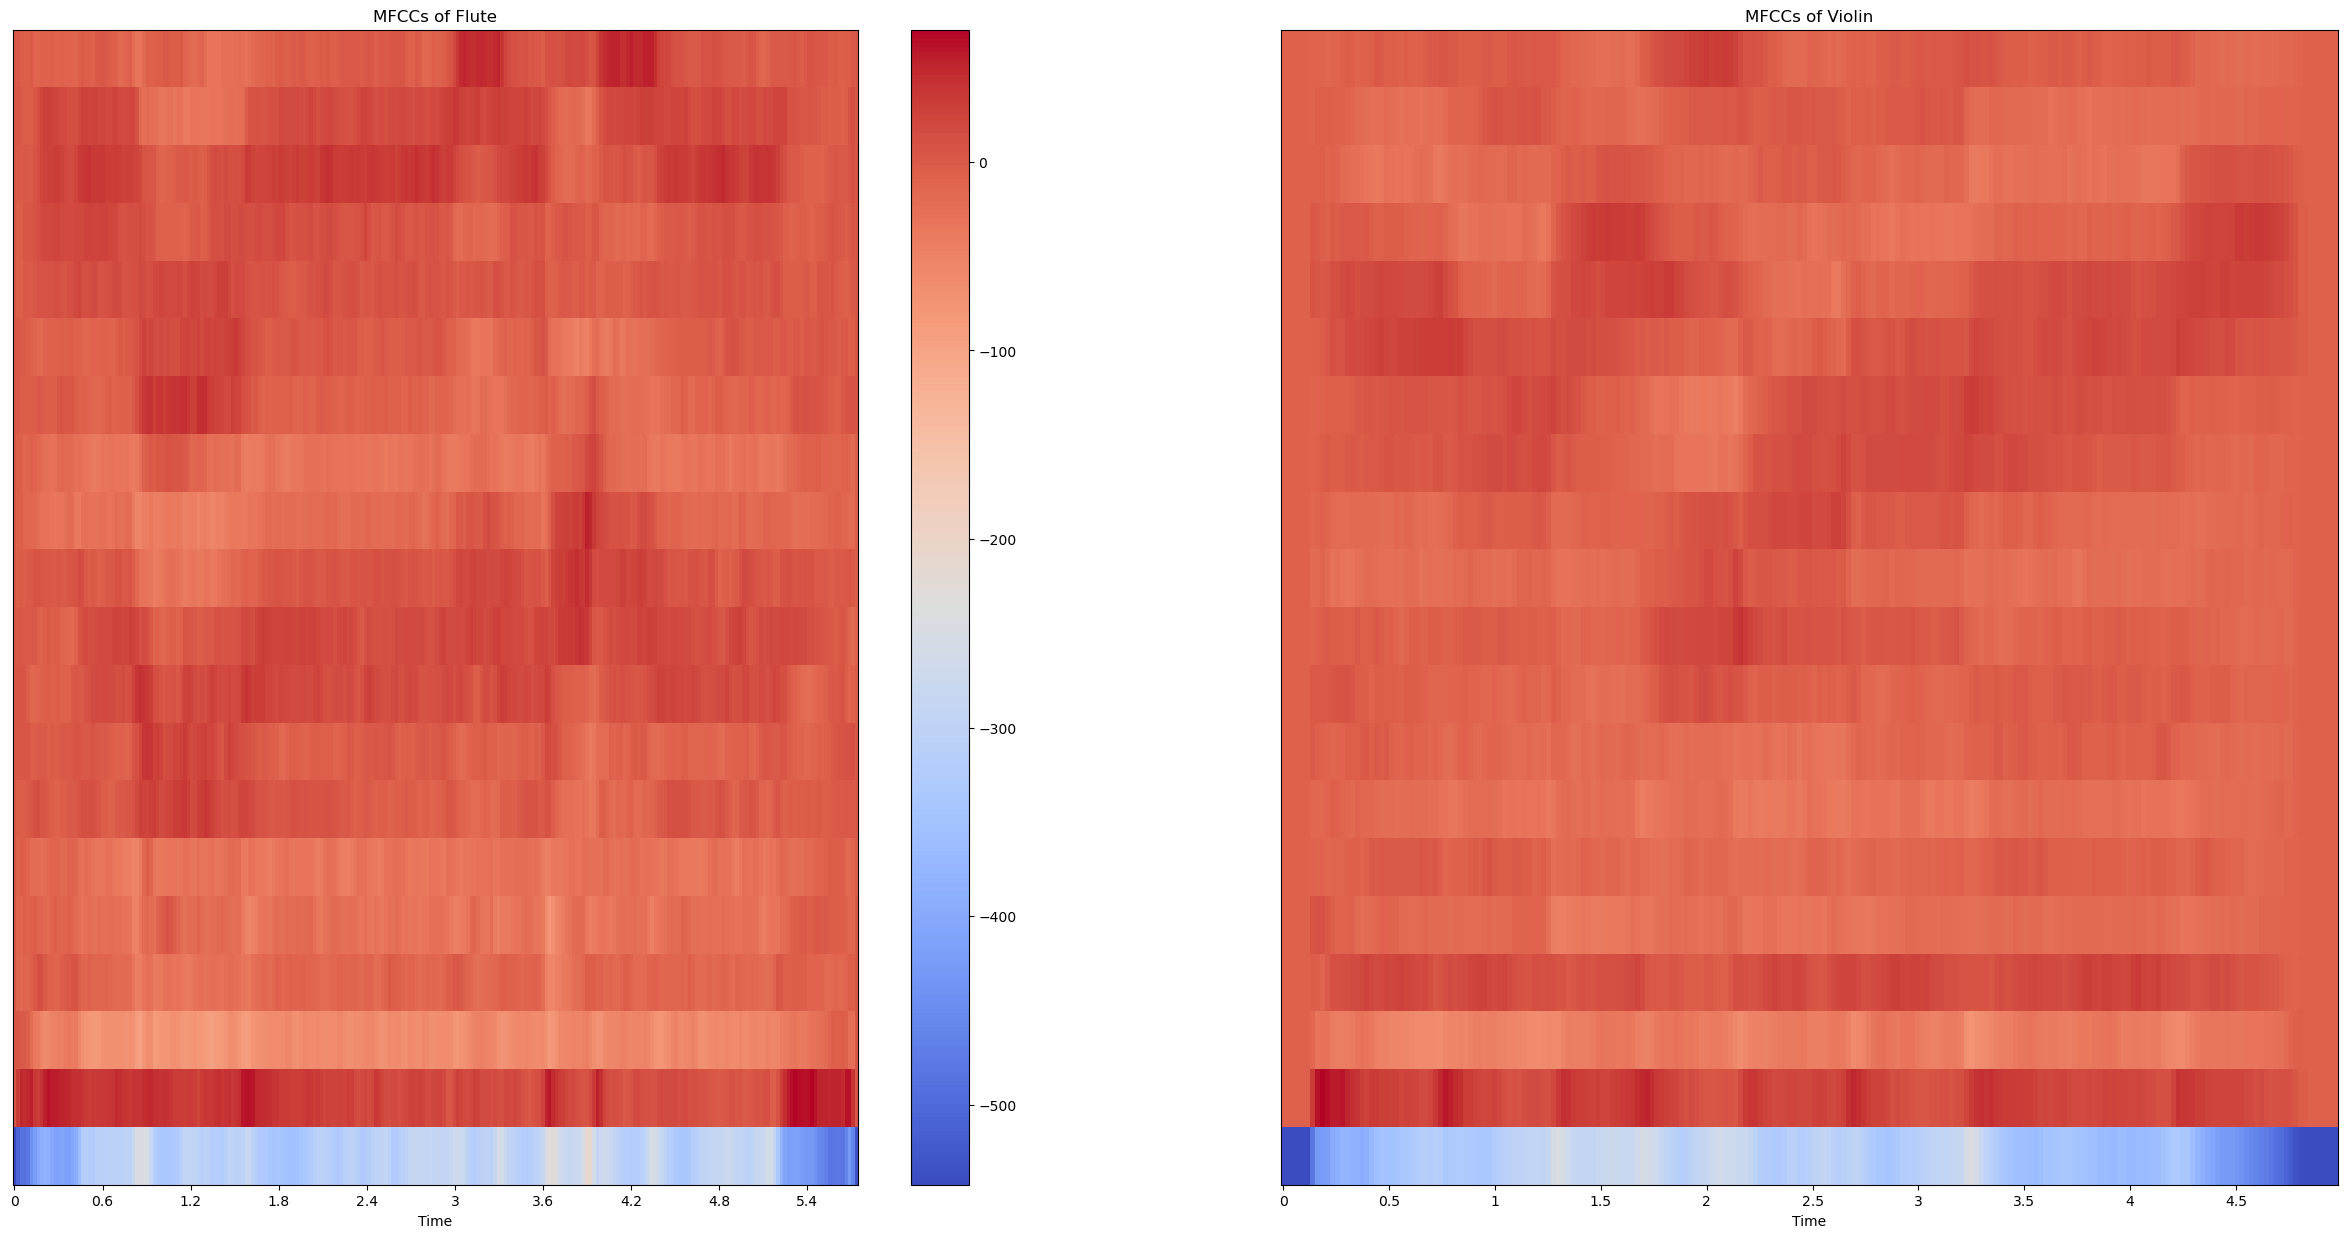

In [30]:
# Take MFCCs of sounds:
fluteMFCC = librosa.feature.mfcc(y=flute, sr=sr_flute)
violinMFCC = librosa.feature.mfcc(y=violin, sr=sr_violin)

# Plot MFCCs
fig, ax = plt.subplots(1,2, figsize = (30,15))
ax[0].set(title = 'MFCCs of Flute')
i = librosa.display.specshow(fluteMFCC, x_axis='time', ax=ax[0])
ax[1].set(title = 'MFCCs of Violin')
librosa.display.specshow(violinMFCC, x_axis='time', ax=ax[1])
plt.colorbar(i)